In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [2]:
# read in the raw data from the github url

r = pd.read_csv("https://raw.githubusercontent.com/suneel0101/lesson-plan/master/crunchbase_monthly_export.csv")

#### 1. Clean the data. Use .apply and lambda functions where you can

In [31]:
df=r.copy()
# rename the columns to remove spaces and extra characters
df.columns=['link','name','url','category_list','market','funding','status','country','state','region',\
            'city','funding_rounds','found_date','found_month','found_quarter','found_year','init_funding',\
            'final_funding','unnamed']

In [32]:
# convert the funding, year founded, and funding_rounds columns to integers
#df['funding']=['0' if str(x)=="-" else x for x in df['funding']]
#for x in df['funding']:
#    x=x.replace(",","").replace("-","")
#    print x
df['funding']=[(str(x).replace(",",'').replace('-','0.')) for x in df['funding']]
df['funding']=df['funding'].astype(np.float).astype(np.int)
df['found_year']=[0 if np.isnan(x) else np.int(x) for x in df['found_year']]
df['funding_rounds']=df['funding_rounds'].astype(np.int)

In [33]:
# convert category_list so that each cell is a list of categories
def l(x):
    r=str(x).split('|')
    r=r[1:]
    r=r[:-1]
    return r
df['category_list']=df['category_list'].apply(lambda x: l(x))

In [34]:
df.columns

Index([u'link', u'name', u'url', u'category_list', u'market', u'funding',
       u'status', u'country', u'state', u'region', u'city', u'funding_rounds',
       u'found_date', u'found_month', u'found_quarter', u'found_year',
       u'init_funding', u'final_funding', u'unnamed'],
      dtype='object')

In [7]:
# use value_counts on market, status, and country_code to check for any repeats or misnamed entries
df.groupby(['market','status','country'])['name'].value_counts().sort_values(ascending=False)

market                 status     country  name                               
 SaaS                  operating  USA      Kickserv                               2
 Education             operating  USA      University of Chicago                  2
 Contact Management    acquired   USA      Jigsaw                                 1
                       closed     USA      Friendsignia                           1
                                           Bizily                                 1
                                  POL      QRcao                                  1
                                  CHE      connex.io                              1
                       acquired   USA      Plaxo                                  1
                                           Bantam Live                            1
                       closed     USA      InsideAxis̢��_�                        1
                       acquired   LVA      Cobook                                

In [36]:
df.head(5)

,link,name,url,category_list,market,funding,status,country,state,region,city,funding_rounds,found_date,found_month,found_quarter,found_year,init_funding,final_funding,unnamed
0,/organization/canal-do-credito,Canal do Credito,http://www.canaldocredito.com.br,"[Credit, Technology, Services, Finance]",Credit,750000,NaN,BRA,NaN,Rio de Janeiro,Belo Horizonte,1,NaT,NaT,NaN,NaN,1/1/10,1/1/10,NaN
1,/organization/waywire,#waywire,http://www.waywire.com,"[Entertainment, Politics, Social Media, News]",Entertainment,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01,2012-06-01,2.0,2012.0,6/30/12,6/30/12,NaN
2,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,[Games],Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaT,NaT,NaN,NaN,6/4/10,9/23/10,NaN
3,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,"[Publishing, Education]",Education,40000,operating,EST,NaN,Tallinn,Tallinn,1,2012-10-26,2012-10-01,4.0,2012.0,8/9/12,8/9/12,NaN
4,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,"[Electronics, Guides, Coffee, Restaurants, Mus...",Apps,1500000,operating,GBR,NaN,London,London,1,2011-04-01,2011-04-01,2.0,2011.0,4/1/11,4/1/11,NaN


In [ ]:
# BONUS: convert the date columns to appropriate datetime objects

In [37]:
df['found_date']=df['found_date'].apply(lambda x: pd.to_datetime(x))
df['found_month']=df['found_month'].apply(lambda x: pd.to_datetime(x).)
df['found_quarter']=df['found_quarter'].apply(lambda x: (pd.to_datetime(x).month-1)/3+1)
df['found_year']=df['found_date'].dt.year

AttributeError: 'NaTType' object has no attribute 'Month'

#### 2. Using isnull(), take a subset of the dataframe that has no founded at date

#### 3. Create a new column, founded_year_x, that's a copy of founded_year. Then, replace all the missing values with either the mean , mode, or median of that column. 
Add a note explaining which statistic you picked and why:

#### 4. Take a subset of US-based companies using boolean selection

#### 5. Create a pivot table showing total, mean, and median funding amount by year

#### 6. Create a pivot table showing total, mean and median funding amount by market

In [ ]:
min(df['init_funding'])
x=date(2000,1,1)-date(1999,2,2)
print x

#### 7. CHALLENGE: Using matplotlib, create a scatter plot showing funding amount on the y-axis, and first_funding_date on the x-axis
(first_funding_date will need to be a timestamp)

2012-12-31 00:00:00


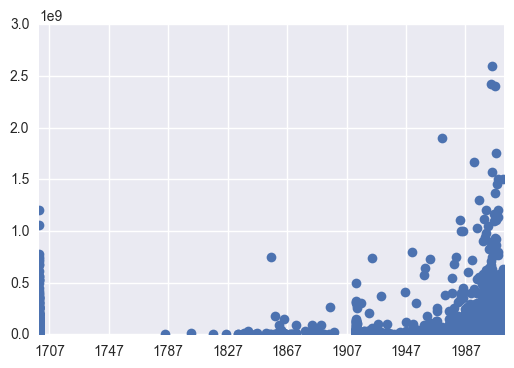

In [46]:
dates=pd.to_datetime([x if str(x)!="NaT" else date(1700,1,1) for x in df['found_date'] ])
funds=pd.to_datetime([x if str(x)!="NaT" else date(1700,1,1) for x,y in zip(df['funding'],df['found_date']) ])
dates=[pd.to_datetime(str(int(str(x)[0:4])-100)+str(x)[4:]) if int(str(x)[0:4])>2012 else x for x in dates]
print max(dates)
plt.ylim(0,.3*10**10)
plt.plot_date(dates,df['funding'])


datetime64[ns]


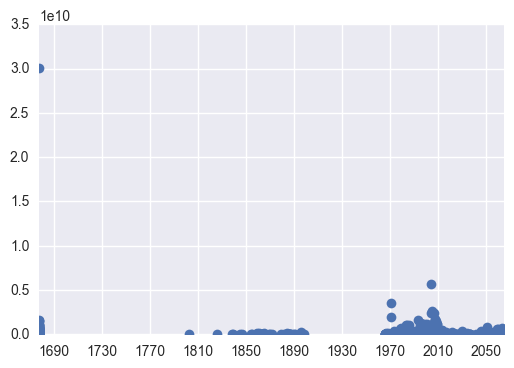

In [51]:
x=pd.DataFrame(df['funding'].copy())
y=pd.DataFrame(df['found_date'].copy())
x=pd.DataFrame([i for i,j in zip(x['funding'],y['found_date']) if str(j)!="NaT"],columns=['funding'])
y=pd.DataFrame([datetime.strptime(str(j)[0:10],"%Y-%m-%d") for i,j in zip(x['funding'],\
                                        y['found_date']) if str(j)!="NaT"],columns=['found_date'])
print y['found_date'].dtype
newdf=pd.concat([x,y],axis=1)

plt.plot_date(newdf['found_date'],newdf['funding'])

#### 8. Here's the fun part. Create a hypothesis based on your data that you can reasonably test. 
For example: "Credit companies based in the US that only get 1 round of funding tend to receive more funding than companies based outside the US"



When you have your hypothesis, write it below, and Slack it to the instructors so we can check in. 

#### 9. Test your hypothesis. 

You'll need to evaluate your hypothesis using a t-test (see Monday's lecture 1.3), so make sure you have enough data compare samples. If your original hypothesis is too narrow, you may need to broaden the scope.

#### 10. CHALLENGE
- Plot the distribution of both samples
- Explain your results in one short sentence. 
- Explain your result in a slighly longer technical paragraph, touching on the statistics you presented. 
- Subset your findings: if you looked at a certain market in a certain geography, break it down by another variable (e.g number of funding rounds) and compare those samples. 